In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('C:/USERS/YASHN/USED_CARDETAILS2.CSV')
df

,Unnamed: 0,brands,variant,driven_kms,owners,fuel,EMI,price,Location
0,0,2014 Maruti Swift,Manual,"22,424",2.0,Petrol,"9,076","4,07,999",Mumbai
1,1,2019 Maruti Vitara Brezza,Manual,"17,280",1.0,Diesel,"18,656",NaN,Mumbai
2,2,2019 Hyundai Grand i10,Manual,"10,153",1.0,Petrol,"11,874",NaN,Mumbai
3,3,2019 Maruti Baleno,Manual,"65,720",1.0,Petrol,"16,252",NaN,Mumbai
4,4,2019 Maruti Baleno,Manual,"42,158",1.0,Petrol,"16,877",NaN,Mumbai
...,...,...,...,...,...,...,...,...,...
3653,813,2015 Hyundai Creta,Manual,"53,083",1.0,Petrol,"17,609","7,91,599",Gurgaon
3654,814,2019 Maruti Vitara Brezza,Manual,"31,245",1.0,Diesel,"17,867","8,03,199",Gurgaon
3655,815,2020 Ford Ecosport,Manual,"32,965",1.0,Diesel,"16,775","7,54,099",Gurgaon
3656,816,2018 Maruti Baleno,Manual,"23,091",1.0,Petrol,"13,547","6,08,999",Gurgaon


In [3]:
#displaying the max columns
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,brands,variant,driven_kms,owners,fuel,EMI,price,Location
0,0,2014 Maruti Swift,Manual,"22,424",2.0,Petrol,"9,076","4,07,999",Mumbai
1,1,2019 Maruti Vitara Brezza,Manual,"17,280",1.0,Diesel,"18,656",NaN,Mumbai
2,2,2019 Hyundai Grand i10,Manual,"10,153",1.0,Petrol,"11,874",NaN,Mumbai
3,3,2019 Maruti Baleno,Manual,"65,720",1.0,Petrol,"16,252",NaN,Mumbai
4,4,2019 Maruti Baleno,Manual,"42,158",1.0,Petrol,"16,877",NaN,Mumbai


In [4]:
# Checking the info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3658 non-null   int64  
 1   brands      3658 non-null   object 
 2   variant     3606 non-null   object 
 3   driven_kms  3658 non-null   object 
 4   owners      3512 non-null   float64
 5   fuel        3658 non-null   object 
 6   EMI         3658 non-null   object 
 7   price       3086 non-null   object 
 8   Location    3658 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 257.3+ KB


In [5]:
# Checking null values
df.isnull().sum()

Unnamed: 0      0
brands          0
variant        52
driven_kms      0
owners        146
fuel            0
EMI             0
price         572
Location        0
dtype: int64

There are null values in our dataset. 

In [6]:
# Checking the dimensions of the training dataset
df.shape

(3658, 9)

<AxesSubplot:>

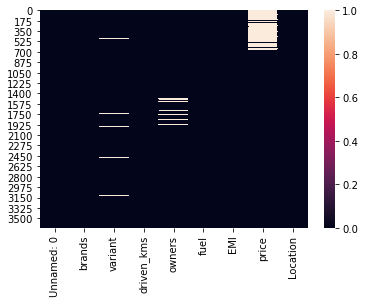

In [7]:
# plotting heatmap
sns.heatmap(df.isnull())

In [8]:
# Filling missing values with mode
df['variant']=df['variant'].fillna(df['variant'].mode()[0])
df['owners']=df['owners'].fillna(df['owners'].mode()[0])
df['price']=df['price'].fillna(df['price'].mode()[0])

In [9]:
# Dropping the unrequired column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df

,brands,variant,driven_kms,owners,fuel,EMI,price,Location
0,2014 Maruti Swift,Manual,"22,424",2.0,Petrol,"9,076","4,07,999",Mumbai
1,2019 Maruti Vitara Brezza,Manual,"17,280",1.0,Diesel,"18,656","3,44,999",Mumbai
2,2019 Hyundai Grand i10,Manual,"10,153",1.0,Petrol,"11,874","3,44,999",Mumbai
3,2019 Maruti Baleno,Manual,"65,720",1.0,Petrol,"16,252","3,44,999",Mumbai
4,2019 Maruti Baleno,Manual,"42,158",1.0,Petrol,"16,877","3,44,999",Mumbai
...,...,...,...,...,...,...,...,...
3653,2015 Hyundai Creta,Manual,"53,083",1.0,Petrol,"17,609","7,91,599",Gurgaon
3654,2019 Maruti Vitara Brezza,Manual,"31,245",1.0,Diesel,"17,867","8,03,199",Gurgaon
3655,2020 Ford Ecosport,Manual,"32,965",1.0,Diesel,"16,775","7,54,099",Gurgaon
3656,2018 Maruti Baleno,Manual,"23,091",1.0,Petrol,"13,547","6,08,999",Gurgaon


In [11]:
# Rechecking missing values in our data
df.isnull().sum()

brands        0
variant       0
driven_kms    0
owners        0
fuel          0
EMI           0
price         0
Location      0
dtype: int64

<AxesSubplot:>

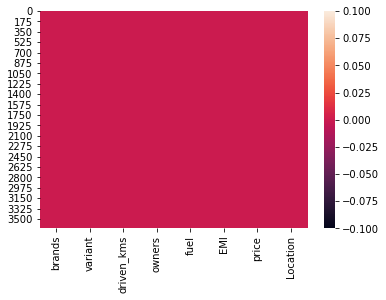

In [12]:
# plotting heatmap
sns.heatmap(df.isnull())

Now we can see that there are no null values in our dataset.

In [13]:
# checking the unique values
df.nunique()

brands         467
variant          2
driven_kms    3516
owners           4
fuel             4
EMI           2686
price         2288
Location         8
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head() 

,brands,variant,driven_kms,owners,fuel,EMI,price,Location
0,131,1,850,1,1,2477,818,6
1,390,1,554,0,0,1366,515,6
2,364,1,221,0,1,410,515,6
3,379,1,2817,0,1,1142,515,6
4,379,1,1903,0,1,1207,515,6


array([[<AxesSubplot:title={'center':'brands'}>,
        <AxesSubplot:title={'center':'variant'}>,
        <AxesSubplot:title={'center':'driven_kms'}>,
        <AxesSubplot:title={'center':'owners'}>,
        <AxesSubplot:title={'center':'fuel'}>,
        <AxesSubplot:title={'center':'EMI'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Location'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<Ax

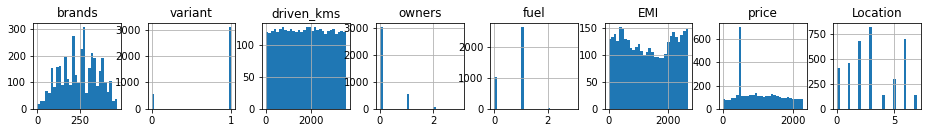

In [15]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

In [16]:
# Checking Correlation
df.corr()

,brands,variant,driven_kms,owners,fuel,EMI,price,Location
brands,1.000000,-0.119002,-0.230600,-0.189549,0.154491,-0.159703,0.188050,-0.096868
variant,-0.119002,1.000000,0.039619,-0.036497,-0.057002,-0.009507,0.087652,-0.103761
driven_kms,-0.230600,0.039619,1.000000,0.036784,-0.178217,0.009160,0.031618,-0.004818
owners,-0.189549,-0.036497,0.036784,1.000000,-0.022919,0.021422,-0.017727,-0.029217
fuel,0.154491,-0.057002,-0.178217,-0.022919,1.000000,0.005446,-0.091856,-0.058554
EMI,-0.159703,-0.009507,0.009160,0.021422,0.005446,1.000000,-0.406528,-0.003184
price,0.188050,0.087652,0.031618,-0.017727,-0.091856,-0.406528,1.000000,-0.289449
Location,-0.096868,-0.103761,-0.004818,-0.029217,-0.058554,-0.003184,-0.289449,1.000000


<AxesSubplot:>

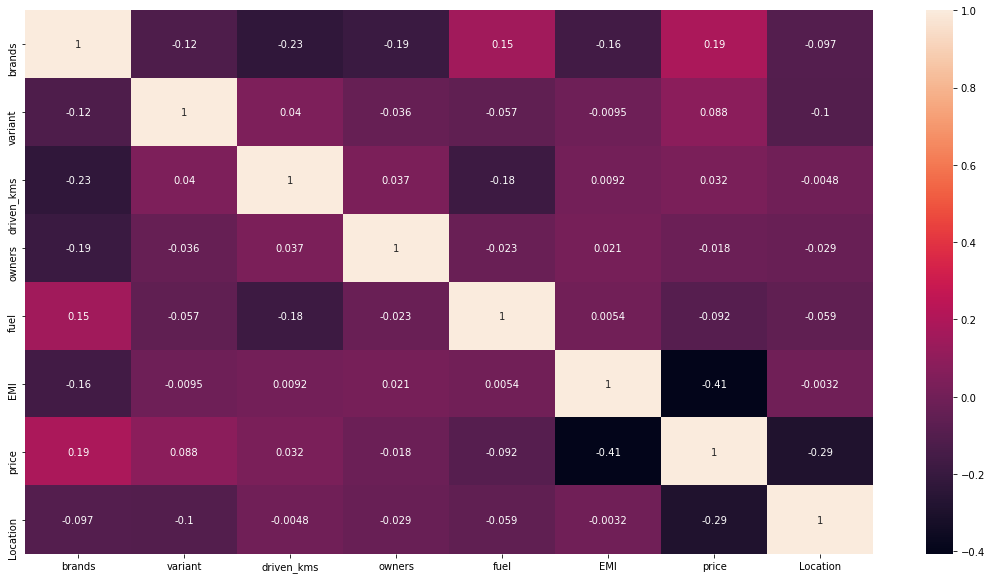

In [17]:
# Plotting correlation heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

In [18]:
# Checking the target Variable
df['price'].value_counts()

515     586
484      12
1408     11
1396     10
1493      9
       ... 
1536      1
1534      1
1532      1
1530      1
2047      1
Name: price, Length: 2288, dtype: int64

<AxesSubplot:xlabel='price', ylabel='count'>

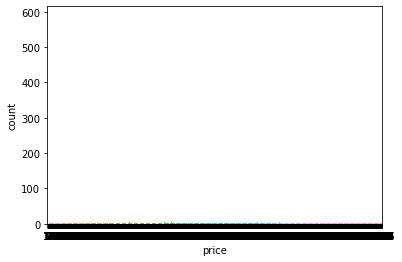

In [19]:
sns.countplot(df['price'])

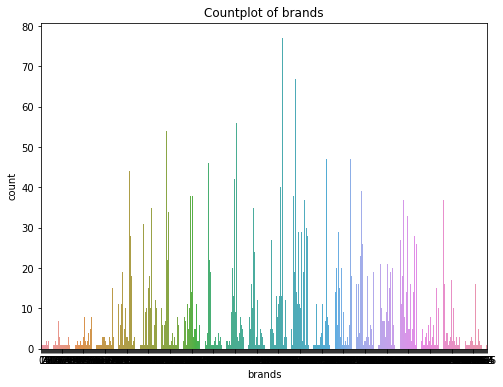

252    77
266    67
214    65
204    56
131    54
       ..
13      1
17      1
21      1
23      1
465     1
Name: brands, Length: 467, dtype: int64

In [21]:
# Let's check the column brands

plt.subplots(figsize=(8,6))
sns.countplot(x="brands", data=df)
plt.title("Countplot of brands")
plt.xlabel('brands')
plt.ylabel("count")
plt.show()

df['brands'].value_counts()

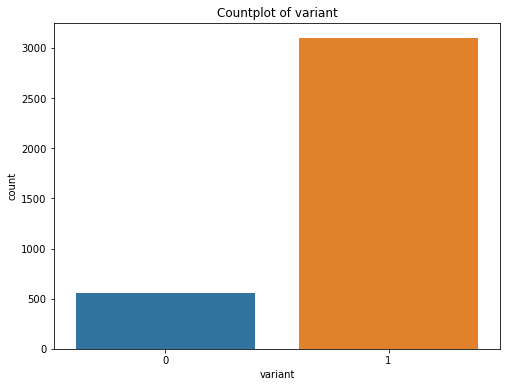

1    3097
0     561
Name: variant, dtype: int64

In [22]:
# checking  the  value count of column variant

plt.subplots(figsize=(8,6))
sns.countplot(x="variant", data=df)
plt.title("Countplot of variant")
plt.xlabel('variant')
plt.ylabel("count")
plt.show()

df['variant'].value_counts()

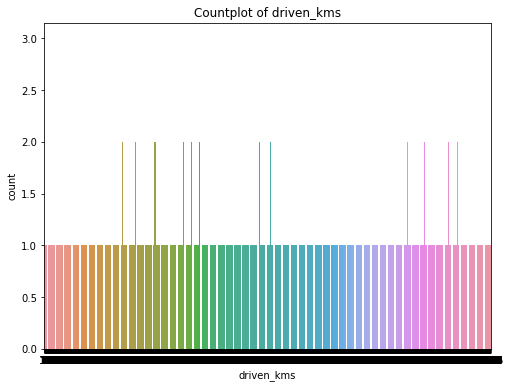

2229    3
376     3
1633    2
1729    2
268     2
       ..
2692    1
645     1
2696    1
2700    1
2047    1
Name: driven_kms, Length: 3516, dtype: int64

In [23]:
# checking  the  value count of column driven_kms

plt.subplots(figsize=(8,6))
sns.countplot(x="driven_kms", data=df)
plt.title("Countplot of driven_kms")
plt.xlabel('driven_kms')
plt.ylabel("count")
plt.show()

df['driven_kms'].value_counts()

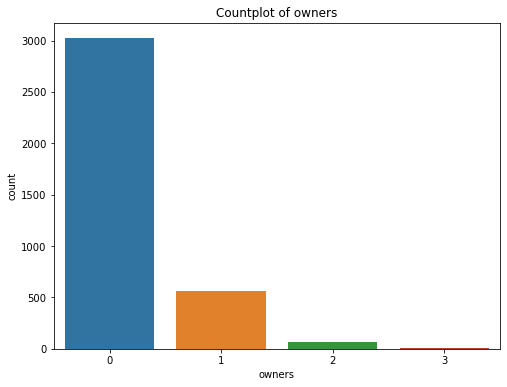

0    3023
1     559
2      69
3       7
Name: owners, dtype: int64

In [24]:
# checking  the  value count of column owners

plt.subplots(figsize=(8,6))
sns.countplot(x="owners", data=df)
plt.title("Countplot of owners")
plt.xlabel('owners')
plt.ylabel("count")
plt.show()

df['owners'].value_counts()

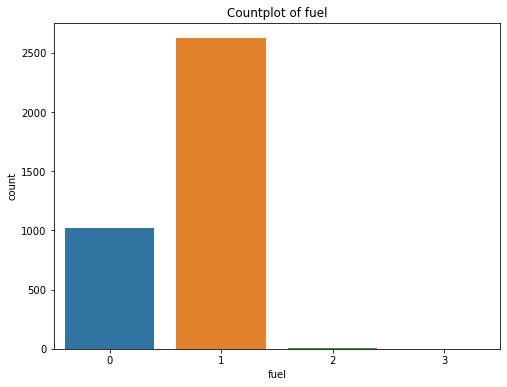

1    2623
0    1024
2      10
3       1
Name: fuel, dtype: int64

In [25]:
# checking  the  value count of column fuel

plt.subplots(figsize=(8,6))
sns.countplot(x="fuel", data=df)
plt.title("Countplot of fuel")
plt.xlabel('fuel')
plt.ylabel("count")
plt.show()

df['fuel'].value_counts()

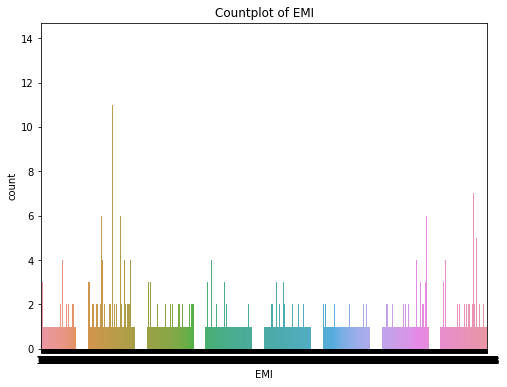

2174    14
2143    12
416     11
430     11
530      9
        ..
1474     1
1472     1
1470     1
1468     1
2047     1
Name: EMI, Length: 2686, dtype: int64

In [27]:
# checking  the  value count of column EMI

plt.subplots(figsize=(8,6))
sns.countplot(x="EMI", data=df)
plt.title("Countplot of EMI")
plt.xlabel('EMI')
plt.ylabel("count")
plt.show()

df['EMI'].value_counts()

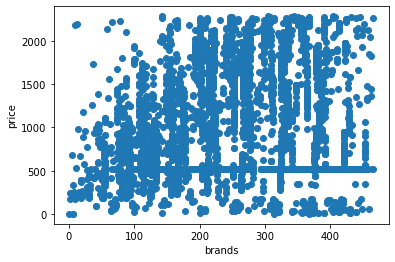

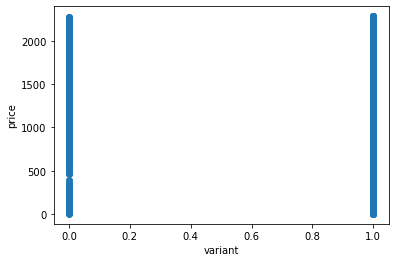

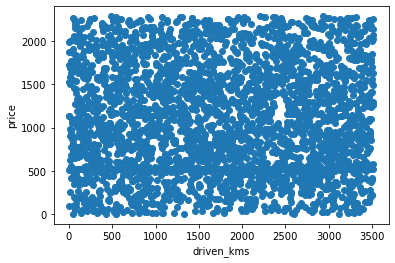

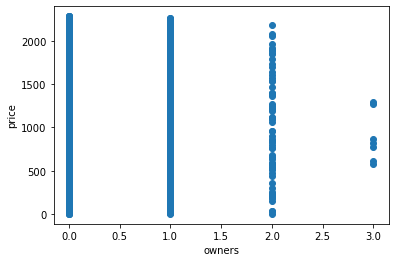

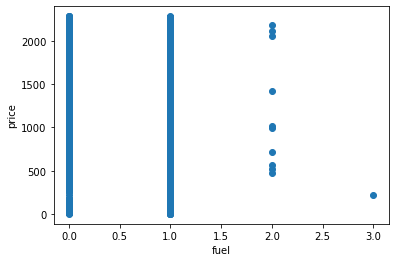

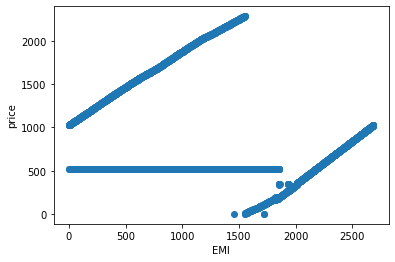

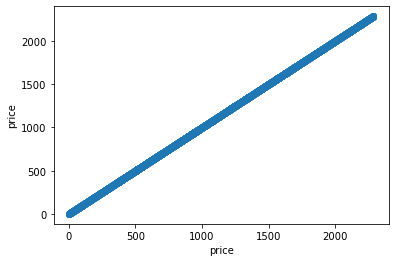

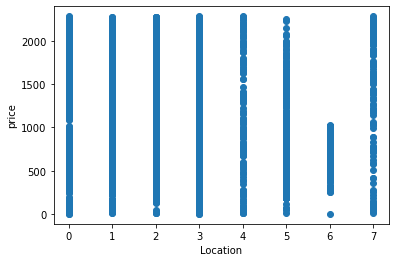

In [28]:
# plotting the Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    df=df.copy()
    plt.scatter(df[col],df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [29]:
# Checking the Statistical Summary
df.describe()

,brands,variant,driven_kms,owners,fuel,EMI,price,Location
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,245.039913,0.846638,1754.608256,0.196282,0.723346,1336.989065,1032.421815,3.155823
std,107.154051,0.360386,1010.233229,0.454994,0.455281,811.814221,615.444935,2.095686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,1.000000,878.250000,0.000000,0.000000,596.250000,515.000000,2.000000
50%,252.000000,1.000000,1759.000000,0.000000,1.000000,1312.500000,924.500000,3.000000
75%,329.750000,1.000000,2623.750000,0.000000,1.000000,2094.000000,1531.750000,5.000000
max,466.000000,1.000000,3515.000000,3.000000,3.000000,2685.000000,2287.000000,7.000000


brands          AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
variant       AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
driven_kms    AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
owners        AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
fuel          AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
EMI           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
price         AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Location      AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
dtype: object

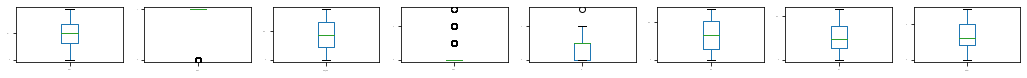

In [30]:
# Checking Outliers
df.plot(kind='box',subplots=True,layout=(10,8),sharex=False,fontsize=1,figsize=(18,12))

We can see there are outliers in our dataset which we need to remove before moving further.

In [31]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.06440682, 0.42560902, 0.89556738, ..., 1.40446763, 0.34844893,
        1.35734346],
       [1.35300442, 0.42560902, 1.18860909, ..., 0.03574081, 0.84084298,
        1.35734346],
       [1.11032994, 0.42560902, 1.51828101, ..., 1.14202951, 0.84084298,
        1.35734346],
       ...,
       [1.49300894, 0.42560902, 0.31245399, ..., 0.1699994 , 1.64225309,
        0.07436426],
       [0.7463182 , 0.42560902, 0.86289719, ..., 0.76504445, 0.98410263,
        0.07436426],
       [1.53108853, 2.34957424, 0.57777553, ..., 1.14944832, 0.68483695,
        0.07436426]])

In [32]:
threshold=3
print(np.where(z>3))

(array([  20,   33,   56,  176,  522,  710,  730,  736,  747,  752,  756,
        798,  806,  827,  879,  908,  926,  953, 1017, 1034, 1043, 1067,
       1097, 1113, 1113, 1138, 1140, 1211, 1216, 1230, 1244, 1259, 1274,
       1303, 1335, 1372, 1429, 1464, 1495, 1500, 1541, 1558, 1562, 1636,
       1650, 1686, 1789, 1799, 1808, 1837, 1897, 1944, 2114, 2128, 2308,
       2482, 2484, 2496, 2551, 2566, 2626, 2863, 2893, 2901, 3030, 3040,
       3051, 3133, 3213, 3217, 3305, 3315, 3333, 3452, 3460, 3525, 3657],
      dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))


In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,brands,variant,driven_kms,owners,fuel,EMI,price,Location
0,131,1,850,1,1,2477,818,6
1,390,1,554,0,0,1366,515,6
2,364,1,221,0,1,410,515,6
3,379,1,2817,0,1,1142,515,6
4,379,1,1903,0,1,1207,515,6
...,...,...,...,...,...,...,...,...
3652,155,1,3250,1,0,1142,1997,3
3653,155,1,2403,0,1,1276,2090,3
3654,390,1,1348,0,0,1301,2110,3
3655,405,1,1439,0,0,1199,2043,3


In [35]:
df_new.shape

(3582, 8)

In [36]:
# Checking the percentage of loss data
loss_percent =(3658-3582)/3658*100
print(loss_percent)

2.077638053581192


In [37]:
#checking Skewness after removing Outliers
df_new.skew()

brands       -0.090023
variant      -1.949912
driven_kms    0.008155
owners        1.896259
fuel         -0.898523
EMI           0.040828
price         0.369597
Location      0.207224
dtype: float64

In [38]:
# Removing Skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[['variant','owners']] = scaler.fit_transform(df_new[['variant','owners']].values)

In [39]:
df_new.skew()

brands       -0.090023
variant      -1.949912
driven_kms    0.008155
owners        1.896259
fuel         -0.898523
EMI           0.040828
price         0.369597
Location      0.207224
dtype: float64

There is no skewness in our data.

In [40]:
x = df_new.drop("price",axis=1)
y = df_new["price"]

In [41]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [42]:
X

,brands,variant,driven_kms,owners,fuel,EMI,Location
0,-1.084579,0.421784,-0.894065,2.325483,0.613012,1.408861,1.354219
1,1.343593,0.421784,-1.186758,-0.430018,-1.587197,0.038029,1.354219
2,1.099838,0.421784,-1.516038,-0.430018,0.613012,-1.141553,1.354219
3,1.240466,0.421784,1.050961,-0.430018,0.613012,-0.238359,1.354219
4,1.240466,0.421784,0.147172,-0.430018,0.613012,-0.158157,1.354219
...,...,...,...,...,...,...,...
3577,-0.859575,0.421784,1.479124,2.325483,-1.587197,-0.238359,-0.078249
3578,-0.859575,0.421784,0.641586,-0.430018,0.613012,-0.073020,-0.078249
3579,1.343593,0.421784,-0.401628,-0.430018,-1.587197,-0.042173,-0.078249
3580,1.484221,0.421784,-0.311645,-0.430018,-1.587197,-0.168028,-0.078249


In [43]:
# Checking multicollinearity using VIF
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.156703,brands
1,1.035723,variant
2,1.082232,driven_kms
3,1.029262,owners
4,1.056320,fuel
5,1.027555,EMI
6,1.030295,Location


In [46]:
# PCA
# Importing and fitting data to pca
from sklearn.decomposition import PCA

pca =PCA(n_components=5)
pca.fit(x)

PCA(n_components=5)

In [47]:
pca.explained_variance_ratio_

array([6.05248684e-01, 3.88537478e-01, 6.20999775e-03, 2.57821727e-06,
       5.94088870e-07])

In [48]:
x_returned_pca=pca.transform(x)

In [49]:
x_returned_pca.shape

(3582, 5)

In [50]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [51]:
print(selection.feature_importances_)

[0.03322927 0.01126347 0.00805107 0.00296489 0.00655744 0.67060902
 0.26732485]


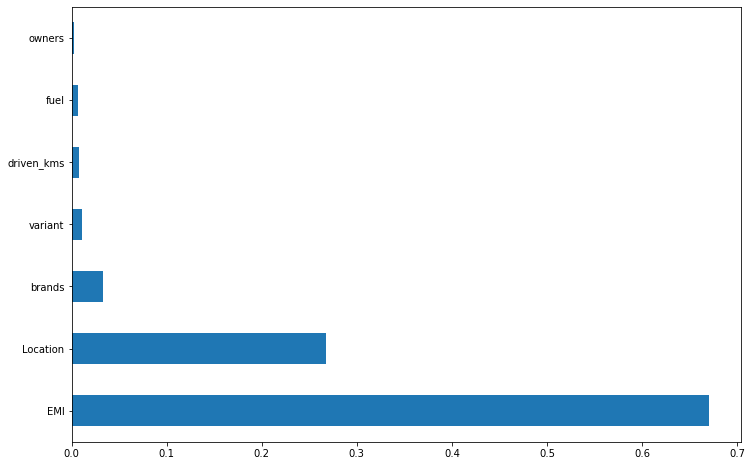

In [52]:
# Plotting graph  for feature importance
plt.figure(figsize = (12,8))
feat_imp = pd.Series(selection.feature_importances_ , index= x.columns)
feat_imp.nlargest(20).plot(kind ='barh')
plt.show()

In [53]:
#splitting the  data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.28147153873741904


In [55]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 292298.71277540765
MAE: 444.51420195561036
r2_score: -1.756492633514628


In [56]:
# Using SGD regressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -1.9584827570349744e+24
MSE: 7.795909738868211e+29
MAE: 813547501477814.1
RMSE: 882944490829871.5


In [57]:
# Using LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [58]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.26586642323256815
MSE: 292228.2098319832
MAE: 444.54018406195564
RMSE: 540.5813628233803


In [59]:
# Using RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'auto'}


In [60]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.14843671079572163
MSE: 338972.12093002495
MAE: 487.3059610065415
RMSE: 582.2131232890796


In [61]:
#Fitting the RandomForest Model 
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
#predicting the value on X_test

y_pred = reg_rf.predict(x_test)

In [63]:
reg_rf.score(x_train, y_train)

0.999980286983545

In [64]:
reg_rf.score(x_test, y_test)

0.9998818854587771

In [65]:
metrics.r2_score(y_test, y_pred)

0.9998818854587771

In [66]:
# Hypereparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [68]:
rf_random = RandomizedSearchCV( estimator = reg_rf , param_distributions= random_grid , scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [69]:
rf_random.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [71]:
prediction = rf_random.predict(x_test)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.4250206422326217
MSE: 229.73974943207148
RMSE: 15.15716825241679


In [73]:
print("R2 Score of Our Model is : ")
print()
metrics.r2_score(y_test, prediction)

R2 Score of Our Model is : 



0.9994228494775601

Hence, Random Forest Regressor gives us the best accuracy score.

In [74]:
# Saving The model
import pickle
file = 'USED CAR PRICE PREDICTION.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [75]:
# Conclusion
rf_predict = pd.DataFrame({
    'Actual_Price' : y_test,
    'Predicted_Price' : y_pred
})

rf_predict['Error'] = rf_predict['Actual_Price'] - rf_predict['Predicted_Price']

rf_predict

,Actual_Price,Predicted_Price,Error
1443,2111,2109.45,1.55
415,515,515.00,0.00
815,1875,1890.10,-15.10
3098,2070,2069.85,0.15
1588,1685,1684.67,0.33
...,...,...,...
181,725,725.26,-0.26
955,22,20.82,1.18
1129,830,829.71,0.29
1438,666,664.87,1.13
